In [8]:
# Setting up
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Connecting the data files
mouse_data_path = "Resources/Mouse_metadata.csv"
study_result_path = "Resources/Study_results.csv"

# Reading both the files listed above
mouse_data = pd.read_csv(mouse_data_path)
study_data = pd.read_csv(study_result_path)

# Merging both datasets into one 
mouse_complete = pd.merge(study_data, mouse_data, how="left", on=["Mouse ID"])

# Displaying dataset for preview
mouse_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
# Finding the total number of mice
mice_unique = mouse_complete["Mouse ID"].unique()
mice_total = len(mice_unique)
mice_total

249

In [10]:
# Getting the duplicate mice by ID number that show up for Mouse ID and Timepoint
dup_mouse_id = mouse_complete[mouse_complete.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()


In [11]:
# Getting all the data for the duplicated mouse ID
dup_mouse_id_df = mouse_complete[mouse_complete["Mouse ID"] =="g989"]
dup_mouse_id_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Creating a clean dataframe by dropping the duplicated mouse IDs
clean_mouse_df = mouse_complete[mouse_complete["Mouse ID"].isin(dup_mouse_id) == False]
clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Checking numbers of mice in clean dataframe
mice_clean_check = len(clean_mouse_df["Mouse ID"].unique())

248

# Summary Statistics

In [18]:
# Generate a summary statistic table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_vol = clean_mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_vol = clean_mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tumor_vol = clean_mouse_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumor_vol = clean_mouse_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor_vol = clean_mouse_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({
    "Mean Tumor Volume" : mean_tumor_vol,
    "Median Tumor Volume" : median_tumor_vol,
    "Tumor Volume Variance" : variance_tumor_vol,
    "Tumor Volume Std. Dev." : std_tumor_vol,
    "Tumor Volume Std. Error" : sem_tumor_vol
})

# Displaying the dataframe
summary_df

C:\Users\annie\AppData\Local\Temp\ipykernel_1456\3093942846.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor_vol = clean_mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
C:\Users\annie\AppData\Local\Temp\ipykernel_1456\3093942846.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor_vol = clean_mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
C:\Users\annie\AppData\Local\Temp\ipykernel_1456\3093942846.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Using the aggregation method, producing the same summary statistics in a single line
single_line_sum = clean_mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

# Displaying dataframe
single_line_sum

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

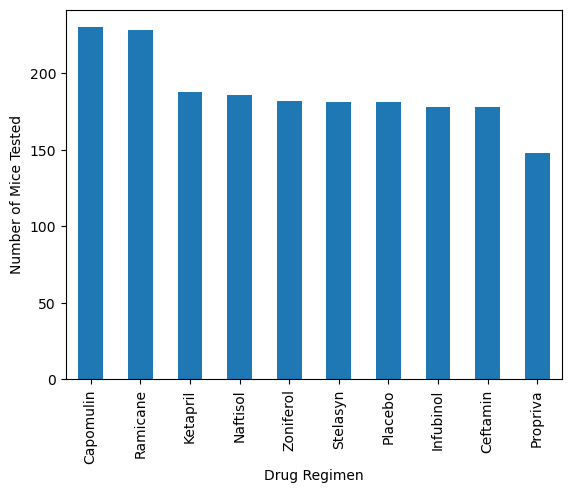

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
drug_count = clean_mouse_df["Drug Regimen"].value_counts()
drug_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

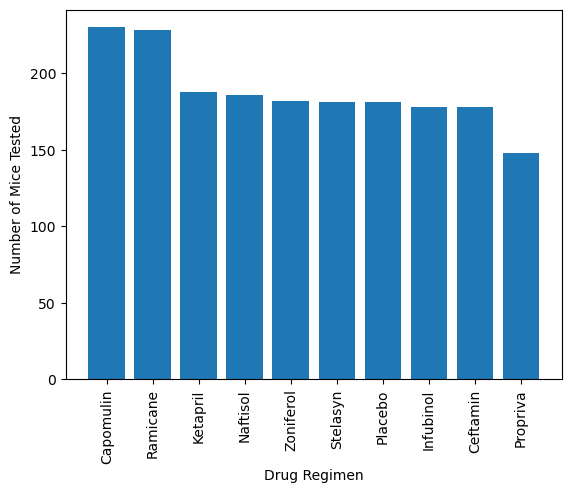

In [27]:
# Generate the same chart as above but using pyplot instead
plt.bar(drug_count.index.values, drug_count.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

In [ ]:
# Generate a pie chart showing the distribution of females vs. males using Pandas